# Unit 5 - Financial Planning

In [45]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [46]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [47]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3 

In [48]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [49]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22130.36
The current value of your 5.3 ETH is $6489.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [50]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [51]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2"
)

In [52]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-11", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']== "AGG"].drop('symbol', axis = 1)
SPY = df_portfolio[df_portfolio['symbol']== "SPY"].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY], axis = 1, keys = ['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                           \
                            open   high    low close   volume trade_count   
timestamp                                                                   
2022-10-11 04:00:00+00:00  95.63  95.83  95.27  95.4  8769515       24296   

                                        SPY                                    \
                                vwap   open    high     low   close    volume   
timestamp                                                                       
2022-10-11 04:00:00+00:00  95.625885  358.3  363.03  355.71  357.74  91448816   

                                                   
                          trade_count        vwap  
timestamp                                          
2022-10-11 04:00:00+00:00      688092  358.717517

In [53]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.4
Current SPY closing price: $357.74


In [54]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17887.00
The current value of your 200 AGG shares is $19080.00


### Savings Health Analysis

In [55]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
values_data = {
    'amount' : [my_btc_value+my_eth_value, my_agg_value+my_spy_value]
}
tickers_for_df = ['crypto','shares']
# Create savings DataFrame
df_savings = pd.DataFrame(values_data,index = tickers_for_df)

# Display savings DataFrame
display(df_savings)

,amount
crypto,28619.896
shares,36967.000


<AxesSubplot:ylabel='amount'>

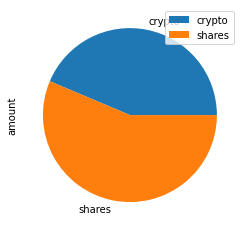

In [56]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount')

In [57]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_agg_value+my_btc_value+my_eth_value+my_spy_value

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congrats, you have enough money for your emergency fund.")
elif total_savings == emergency_fund:
    print("Congrats, you've reached your financial goal.")
else:
    print(f"Sorry, you're ${emergency_fund}-{total_savings} away from your total goal.")

Congrats, you have enough money for your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [58]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-10-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-12', tz='America/New_York').isoformat()

In [59]:
# Get 5 years' worth of historical data for SPY and AGG
df_5yr_port = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG_hist = df_5yr_port[df_5yr_port['symbol']== "AGG"].drop('symbol', axis = 1)
SPY_hist = df_5yr_port[df_5yr_port['symbol']== "SPY"].drop('symbol', axis = 1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_hist,SPY_hist], axis = 1, keys = ['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2018-10-12 04:00:00+00:00  104.71  104.8699  104.6750  104.75  5017438   
2018-10-15 04:00:00+00:00  104.73  104.7835  104.6233  104.68  3047999   
2018-10-16 04:00:00+00:00  104.69  104.7400  104.5800  104.74  5750238   
2018-10-17 04:00:00+00:00  104.71  104.7700  104.5200  104.53  2844251   
2018-10-18 04:00:00+00:00  104.39  104.6195  104.3750  104.46  3158160   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-10-12 04:00:00+00:00       17066  104.765518  276.86  277.09  272.37   
2018-10-15 04:00:00+00:00       11516  104.680553  275.54  277.04  274.30   
2018-10-16 04:00:00+00:00       17022  104.666607  276.56  280.82  276.07   
2018-10-17 04:00:00+00:00       13134  104.644388  280.44  281.15  277.56   
2018-10-18 04:00:00+00:00       13494  104.500896  279.41  280.07  274.97   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-10-12 04:00:00+00:00  275.95  186452035      991520  274.919809  
2018-10-15 04:00:00+00:00  274.40  104132367      543707  275.519667  
2018-10-16 04:00:00+00:00  280.40  119803983      476753  278.542974  
2018-10-17 04:00:00+00:00  280.45  110755987      566702  279.891067  
2018-10-18 04:00:00+00:00  276.40  135603525      747568  277.110785

In [60]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# 60% spy 40% agg
MC_dist = MCSimulation(
    portfolio_data= df_stock_data,
    weights = [.4,.6],
    num_simulation= 500,
    num_trading_days= 252 * 30
)

In [61]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2018-10-12 04:00:00+00:00  104.71  104.8699  104.6750  104.75  5017438   
2018-10-15 04:00:00+00:00  104.73  104.7835  104.6233  104.68  3047999   
2018-10-16 04:00:00+00:00  104.69  104.7400  104.5800  104.74  5750238   
2018-10-17 04:00:00+00:00  104.71  104.7700  104.5200  104.53  2844251   
2018-10-18 04:00:00+00:00  104.39  104.6195  104.3750  104.46  3158160   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-10-12 04:00:00+00:00       17066  104.765518          NaN  276.86   
2018-10-15 04:00:00+00:00       11516  104.680553    -0.000668  275.54   
2018-10-16 04:00:00+00:00       17022  104.666607     0.000573  276.56   
2018-10-17 04:00:00+00:00       13134  104.644388    -0.002005  280.44   
2018-10-18 04:00:00+00:00       13494  104.500896    -0.000670  279.41   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2018-10-12 04:00:00+00:00  277.09  272.37  275.95  186452035      991520   
2018-10-15 04:00:00+00:00  277.04  274.30  274.40  104132367      543707   
2018-10-16 04:00:00+00:00  280.82  276.07  280.40  119803983      476753   
2018-10-17 04:00:00+00:00  281.15  277.56  280.45  110755987      566702   
2018-10-18 04:00:00+00:00  280.07  274.97  276.40  135603525      747568   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-10-12 04:00:00+00:00  274.919809          NaN  
2018-10-15 04:00:00+00:00  275.519667    -0.005617  
2018-10-16 04:00:00+00:00  278.542974     0.021866  
2018-10-17 04:00:00+00:00  279.891067     0.000178  
2018-10-18 04:00:00+00:00  277.110785    -0.014441

In [62]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Justin\Rutgers\API Homework\API-homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010224,0.992471,0.990954,0.999366,1.009701,0.985951,0.992805,0.996263,1.013531,0.999521,...,0.996728,0.994969,1.007171,0.999294,0.996101,1.018833,0.986500,1.004422,1.005908,0.994765
2,1.008513,1.007358,0.979043,0.994494,1.018827,0.980111,0.986420,0.986410,1.010349,1.021589,...,0.993572,0.980809,1.005386,0.992249,0.999932,1.035086,0.974152,1.001987,1.024172,1.001780
3,1.015459,1.008222,0.974752,0.977609,1.008080,0.992781,0.983146,0.979677,1.006457,1.031162,...,0.991370,0.988822,0.992451,0.990037,1.013639,1.022659,0.974980,1.011236,1.022267,0.999869
4,1.012367,1.013593,0.955749,0.993315,1.013909,0.985739,0.983724,0.969041,1.014325,1.007427,...,0.993808,0.979527,0.999492,0.999049,1.009783,1.017478,0.973548,1.024785,1.021748,0.993818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.977810,2.128054,10.132764,2.835541,6.498238,3.051263,1.654569,2.134781,11.684739,3.093940,...,3.293800,7.741999,1.602910,4.431649,2.905484,4.892558,6.081609,1.055773,7.697233,6.216439
7557,0.983060,2.115695,10.074242,2.849145,6.500249,3.022123,1.673967,2.148046,11.887018,3.081367,...,3.325571,7.708908,1.602218,4.491017,2.874313,4.874407,6.002641,1.073286,7.671748,6.191269
7558,0.992993,2.106107,10.115368,2.899691,6.572893,3.053052,1.682515,2.169800,11.851755,3.072155,...,3.299568,7.758093,1.614195,4.464303,2.892755,4.878186,5.919676,1.071476,7.594493,6.111803
7559,1.002124,2.118251,10.132232,2.886390,6.576569,3.095579,1.700677,2.175289,12.003694,3.062709,...,3.282473,7.689640,1.638136,4.437136,2.920619,4.885470,5.896549,1.065235,7.585174,6.047229


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

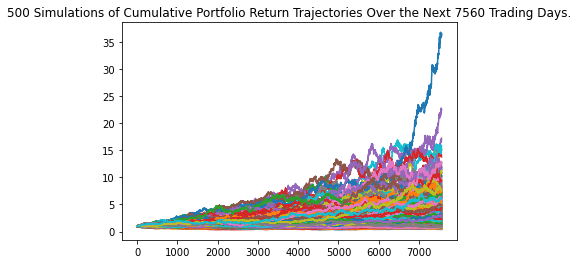

In [63]:
# Plot simulation outcomes
MC_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

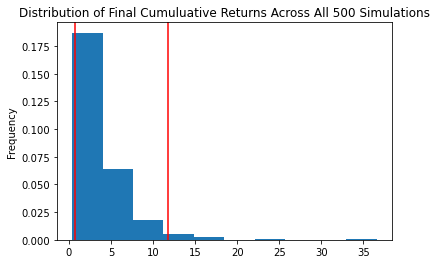

In [64]:
# Plot probability distribution and confidence intervals
MC_dist.plot_distribution()

### Retirement Analysis

In [65]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_dist.summarize_cumulative_return()

# Print summary statistics
summary_stats

count           500.000000
mean              3.747815
std               3.231072
min               0.392827
25%               1.747802
50%               2.875947
75%               4.735862
max              36.548445
95% CI Lower      0.728642
95% CI Upper     11.749558
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [66]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((summary_stats[8] * initial_investment),2)
ci_upper = round((summary_stats[9] * initial_investment),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $14572.83 and $234991.16


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [74]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((summary_stats[8] * initial_investment),2)
ci_upper = round((summary_stats[9] * initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $21859.25 and $352486.74


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [69]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [70]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [71]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [73]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")